In [1]:
from fastai import *
from fastai.vision.all import *
import seaborn as sns

matplotlib.rc('image', cmap='Greys')

import warnings
warnings.filterwarnings('ignore')

In [2]:
three = Path("./3.png")
seven = Path("./7.png")

In [35]:
# Define a function to open an image and convert it to a tensor
# After resizing it to the same size as MNIST datapoints
IMSIZE = (28, 28)
def tensorify_image(x: Path): return tensor(Image.open(x).resize(IMSIZE))

def visualize(img_pth: Path, binarize: bool = False):
    # Read the image as a tensor
    img = tensorify_image(img_pth)
    
    # If binarize, we shall convert the image to a binary image
    if binarize: img = torch.where(img > 0, 255, 0)
    
    # Slice the image into top, bottom and bottom flipped
    top = img[:14, :]
    bottom = img[14:, :]
    flip_bottom = torch.flip(bottom, [0])
    
    # Create a grid of three axes to show the top half, bottom half and the flipped bottom overlaid on the top half
    fig, ax = plt.subplots(1, 4, figsize = (20, 10))
    
    # Create a function to format an axis object in matplotlib to show only relevant stuff and remove other info
    def format_axis(ax:object, title:str):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(title)
        
    # Show top, bottom and flipped bottom
    ax[0].imshow(Image.fromarray(top.numpy().astype(np.uint8)), alpha = 0.7)
    ax[1].imshow(Image.fromarray(bottom.numpy().astype(np.uint8)), alpha = 0.7)
    ax[2].imshow(Image.fromarray(flip_bottom.numpy().astype(np.uint8)), alpha = 0.7)
    
    # Show the overlay of top and flipped bottom on top
    ax[3].imshow(Image.fromarray(top.numpy().astype(np.uint8)), alpha = 0.7)
    ax[3].imshow(Image.fromarray(flip_bottom.numpy().astype(np.uint8)), alpha = 0.7)
    
    # Format the axes to make the objects presentable
    for axis, type_ in zip(ax, ["top", "bottom", "flipped bottom", "flipped bottom on top"]): format_axis(axis, type_)

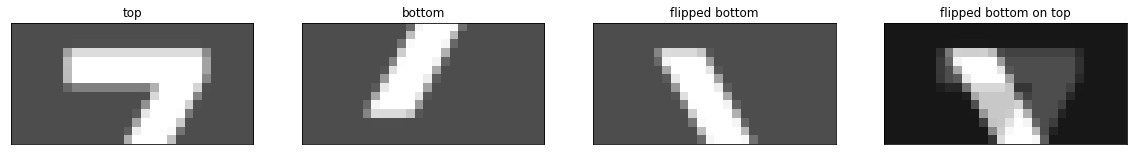

In [36]:
visualize(seven)

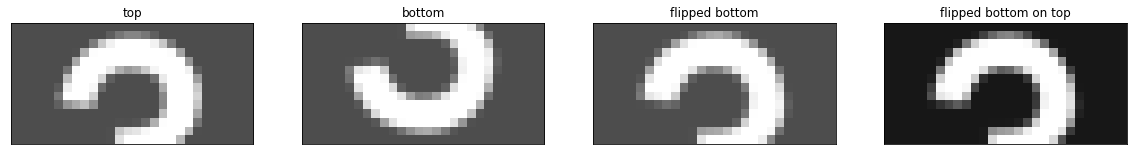

In [38]:
visualize(three)

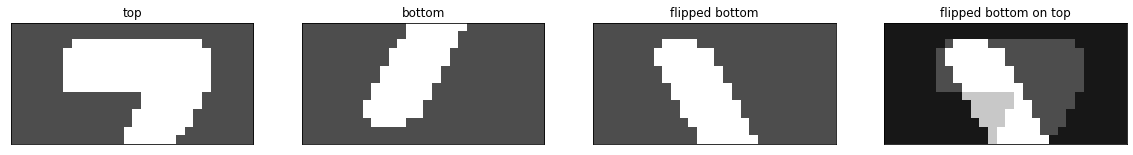

In [39]:
visualize(seven, True)

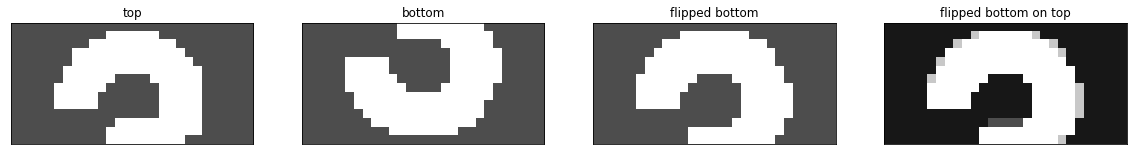

In [40]:
visualize(three, True)